In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 100

# diasbling warning messages
import warnings
warnings.filterwarnings("ignore")

# importing key libraries
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np

# importing wrangle/acquire module
import wrangle
from wrangle import get_zillow_dataset

# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# importing mysql
import env 
from env import user, password, host, get_connection

----
### **``Clustering Module: Data Wrangling Exercises``**

<u>**Acquire and Summarize**</u>

1. Acquire data from the cloud database

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

**Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.** 

Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
  
(Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

----

In [2]:
# pulling zillow dataset and creating a function for future pull:
# query = '''
#         SELECT prop.*,
#         predictions_2017.logerror,
#         predictions_2017.transactiondate,
#         air.airconditioningdesc,
#         arch.architecturalstyledesc,
#         build.buildingclassdesc,
#         heat.heatingorsystemdesc,
#         land.propertylandusedesc,
#         story.storydesc,
#         type.typeconstructiondesc
#         FROM properties_2017 prop
#         JOIN (
#             SELECT parcelid, MAX(transactiondate) AS max_transactiondate
#             FROM predictions_2017
#             GROUP BY parcelid
#             ) pred USING(parcelid)
#         JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
#                           AND pred.max_transactiondate = predictions_2017.transactiondate
#         LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
#         LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
#         LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
#         LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
#         LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
#         LEFT JOIN storytype story USING(storytypeid)
#         LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
#         WHERE propertylandusedesc = "Single Family Residential"
            # AND transactiondate <= '2017-12-31'
            # AND prop.longitude IS NOT NULL
            # AND prop.latitude IS NOT NULL
#         '''

# url = get_connection(user, password, host, "zillow")

In [3]:
# df = pd.read_sql(query, url)
# df.head()

In [4]:
# getting cached zillow dataset
df = get_zillow_dataset()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [5]:
# checking the shape
df.shape

(52319, 68)

In [6]:
# renaming any_value(logerror) and maxtransaction_date columns
df = df.rename(columns = {"any_value(logerror)": "zestimate_error", "maxtransaction_date": "transaction_date"})
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [7]:
# checking the dataframe info
df.dtypes.sort_values()

id                                int64
parcelid                          int64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64
regionidzip                     float64
roomcnt                         float64
storytypeid                     float64
threequarterbathnbr             float64
typeconstructiontypeid          float64
unitcnt                         float64
yardbuildingsqft17              float64
yardbuildingsqft26              float64
yearbuilt                       float64
numberofstories                 float64
fireplaceflag                   float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
buildingclassdesc               float64


In [8]:
# only include properties that have a latitude and longitude value
# let's check how many records have both latitude and longitude features missing

df[["latitude", "longitude"]].isnull().sum() # checks out!

latitude     0
longitude    0
dtype: int64

----
### ```2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)```

In [9]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [10]:
# summary statistics
pd.options.display.float_format = '{:.4f}'.format

summary_stats = df.describe().T
summary_stats["range"] = summary_stats["max"] - summary_stats["min"]
summary_stats

,count,mean,std,min,25%,50%,75%,max,range
id,52319.0000,1496887.6779,859431.0334,349.0000,757581.0000,1500095.0000,2241247.5000,2982270.0000,2981921.0000
parcelid,52319.0000,12996817.9139,3350951.3544,10711855.0000,11510167.5000,12578254.0000,14130361.0000,167687839.0000,156975984.0000
airconditioningtypeid,13615.0000,2.4396,3.8479,1.0000,1.0000,1.0000,1.0000,13.0000,12.0000
architecturalstyletypeid,70.0000,7.1000,2.6657,2.0000,7.0000,7.0000,7.0000,21.0000,19.0000
basementsqft,47.0000,678.9787,711.8252,38.0000,263.5000,512.0000,809.5000,3560.0000,3522.0000
bathroomcnt,52319.0000,2.3000,1.0228,0.0000,2.0000,2.0000,3.0000,18.0000,18.0000
bedroomcnt,52319.0000,3.3008,0.9476,0.0000,3.0000,3.0000,4.0000,14.0000,14.0000
buildingclasstypeid,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,33654.0000,6.2650,1.7163,1.0000,5.0000,6.0000,8.0000,12.0000,11.0000
calculatedbathnbr,52184.0000,2.3053,1.0181,1.0000,2.0000,2.0000,3.0000,18.0000,17.0000


In [11]:
# checking the dataframe info
df.dtypes.sort_values()

id                                int64
parcelid                          int64
pooltypeid7                     float64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidneighborhood            float64
regionidzip                     float64
roomcnt                         float64
storytypeid                     float64
threequarterbathnbr             float64
typeconstructiontypeid          float64
unitcnt                         float64
yardbuildingsqft17              float64
yardbuildingsqft26              float64
yearbuilt                       float64
numberofstories                 float64
fireplaceflag                   float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
buildingclassdesc               float64


In [12]:
# dataframe shape
initial_shape = df.shape
initial_shape

(52319, 68)

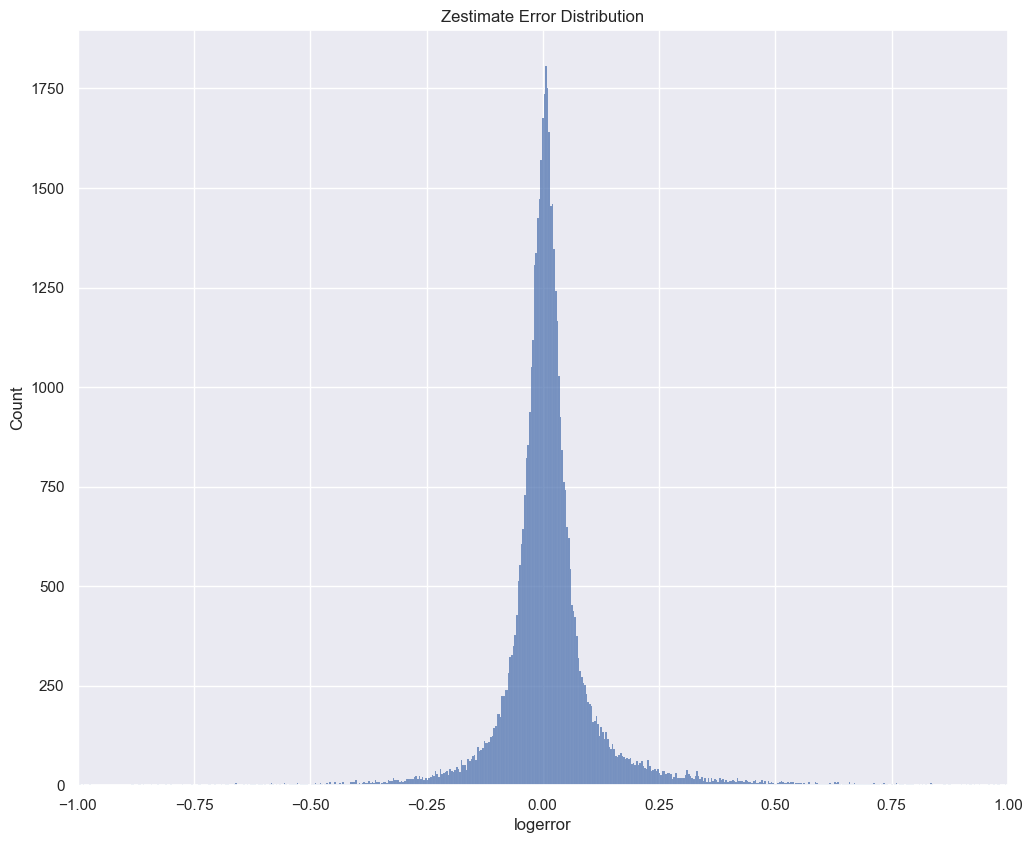

In [13]:
# target variable (zestimate error) distribution
plt.figure(figsize = (12, 10))
sns.histplot(df["logerror"])

plt.xlim(-1, 1)
plt.title("Zestimate Error Distribution")
plt.show()

In [14]:
# value counts by feature:

for col in df.columns:
    print(f'Feature Name: {col}')
    print(f'Data Type: {df[col].dtype}')
    print(f'Unique Values: {df[col].nunique()}')
    print(f'Value Samples: {df[col].unique()}')
    print("--------------------------------------------------------------")

Feature Name: id
Data Type: int64
Unique Values: 52319
Value Samples: [1727539 1387261   11677 ... 2968375 1843709 1187175]
--------------------------------------------------------------
Feature Name: parcelid
Data Type: int64
Unique Values: 52319
Value Samples: [14297519 17052889 14186244 ... 17239384 12773139 12826780]
--------------------------------------------------------------
Feature Name: airconditioningtypeid
Data Type: float64
Unique Values: 4
Value Samples: [nan  1. 13.  5. 11.]
--------------------------------------------------------------
Feature Name: architecturalstyletypeid
Data Type: float64
Unique Values: 5
Value Samples: [nan  7.  3.  8.  2. 21.]
--------------------------------------------------------------
Feature Name: basementsqft
Data Type: float64
Unique Values: 41
Value Samples: [  nan  900. 1416.  224.  100.  512.  380.  204.  515.  273.  200.   90.
 3112.  405. 1252.  912.  254. 3560.  352.  168.  394. 1218.  300.  280.
  800.  600.  640.  819. 1809.  604.  

----
### ``3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. ``

- Run the function and document takeaways from this on how you want to handle missing values.

In [112]:
# semi-borrowed function -- 
# steps
# create a function
# takes in a dataframe
# ea. row/index should be a feature
# first column is the number of total number of feature nulls/missing values
# second column is the percent of nulls within the feature


def null_df(df):
    # creating a container to hold all features and needed null data
    container = []

    for col in list(df.columns):
        feature_info = {
            "Name": col, \
            "Total Null": df[col].isnull().sum(), \
            "Feature Null %": df[col].isnull().sum() / df.shape[0]
        }
        # appending feature and data to container list
        container.append(feature_info)
        
    # creating the new dataframe
    new_df = pd.DataFrame(container)

    # setting the df index to "name"
    new_df = new_df.set_index("Name")

    # setting index name to None
    new_df = new_df.rename_axis(None, axis = 0)

    # sorting df by percentage of null descending
    new_df = new_df.sort_values("Total Null", ascending = False)

    # returning the new null dataframe
    return new_df


In [113]:
# showing null dataframe
zillow_nulls = null_df(df)
zillow_nulls

,Total Null,Feature Null %
buildingclassdesc,52319,1.0000
buildingclasstypeid,52319,1.0000
finishedsquarefeet15,52319,1.0000
finishedsquarefeet13,52319,1.0000
storytypeid,52272,0.9991
basementsqft,52272,0.9991
storydesc,52272,0.9991
yardbuildingsqft26,52256,0.9988
architecturalstyletypeid,52249,0.9987
architecturalstyledesc,52249,0.9987


In [149]:
# checking indices
zillow_nulls.index.tolist()

['buildingclassdesc',
 'buildingclasstypeid',
 'finishedsquarefeet15',
 'finishedsquarefeet13',
 'storytypeid',
 'basementsqft',
 'storydesc',
 'yardbuildingsqft26',
 'architecturalstyletypeid',
 'architecturalstyledesc',
 'typeconstructiondesc',
 'typeconstructiontypeid',
 'fireplaceflag',
 'finishedsquarefeet6',
 'decktypeid',
 'pooltypeid10',
 'poolsizesum',
 'pooltypeid2',
 'hashottuborspa',
 'yardbuildingsqft17',
 'taxdelinquencyyear',
 'taxdelinquencyflag',
 'finishedsquarefeet50',
 'finishedfloor1squarefeet',
 'threequarterbathnbr',
 'fireplacecnt',
 'pooltypeid7',
 'poolcnt',
 'airconditioningdesc',
 'airconditioningtypeid',
 'numberofstories',
 'garagecarcnt',
 'garagetotalsqft',
 'regionidneighborhood',
 'buildingqualitytypeid',
 'unitcnt',
 'propertyzoningdesc',
 'heatingorsystemtypeid',
 'heatingorsystemdesc',
 'regionidcity',
 'lotsizesquarefeet',
 'finishedsquarefeet12',
 'fullbathcnt',
 'calculatedbathnbr',
 'censustractandblock',
 'yearbuilt',
 'structuretaxvaluedollarc

In [160]:
# let's check the total number of features/columns with > 25% missing values
# return back to this!

----
### ``Data Cleaning Continued:``
- Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

**``Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).``**

<u>The input:</u>

1. A dataframe
2. A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
3. A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

<u>The output:</u>

1. The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [161]:
# function to drop columns/rows based on proportion of nulls across record and feature
# borrowed function -- 

def drop_nulls(df, required_column_percentage, required_record_percentage):
    
    feature_null_percentage = 1 - required_column_percentage
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > feature_null_percentage:
            df.drop(columns=col, inplace=True)
            
    feature_threshold = int(required_record_percentage * df.shape[1])
    
    df = df.dropna(axis = 0, thresh = feature_threshold)
    
    return df

In [162]:
# testing the null cleaning function
cleaned_df = drop_nulls(df, .80, .80)
cleaned_df.shape # down to 29 cols from 68 / checks out!

(52311, 29)

In [164]:
# inspecting df
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52311 entries, 0 to 52318
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52311 non-null  int64  
 1   parcelid                      52311 non-null  int64  
 2   bathroomcnt                   52311 non-null  float64
 3   bedroomcnt                    52311 non-null  float64
 4   calculatedbathnbr             52184 non-null  float64
 5   calculatedfinishedsquarefeet  52238 non-null  float64
 6   finishedsquarefeet12          52073 non-null  float64
 7   fips                          52311 non-null  float64
 8   fullbathcnt                   52184 non-null  float64
 9   latitude                      52311 non-null  float64
 10  longitude                     52311 non-null  float64
 11  lotsizesquarefeet             51951 non-null  float64
 12  propertycountylandusecode     52311 non-null  object 
 13  p

In [163]:
# saving new clean dataframe to local drive/repository for future use:
# cleaned_df.to_csv("/Users/mijailmariano/codeup-data-science/clustering-exercises/zillow_cleaned.csv")